In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['pdf.fonttype'] = 42

In [2]:
adata = sc.read_h5ad("/scratch/eli/zuo24/zuo24_gex.h5ad")
program_features = pd.read_csv("/data/norman/eli/T7/202404_SIRLOIN_multiome/figs/supplementary_outs/TableS4_feature_weights.csv")

In [ ]:
adata.obs['majorclass'] = pd.Categorical(adata.obs['majorclass'], categories=['PRPC', 'NRPC', 'MG', 'RGC', 'AC', 'BC', 'HC', 'Rod', 'Cone'])
adata.obs['full_class'] = adata.obs['majorclass'].map(dict(zip(['PRPC', 'NRPC', 'MG', 'RGC', 'AC', 'BC', 'HC', 'Rod', 'Cone'], ['Primary retinal progenitor', 'Neurogenic retinal progenitor', 'Müller glia', 'Retinal ganglion cell', 'Amacrine cell', 'Bipolar cell', 'Horizontal cell', 'Rod photoreceptor', 'Cone photoreceptor'])))

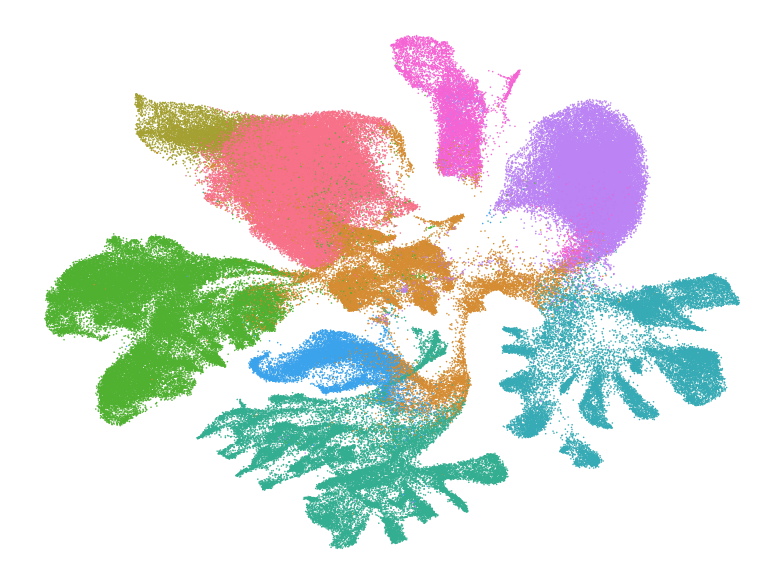

In [151]:
plt.figure(figsize = (8,6))
sns.scatterplot(x = adata.obsm['X_umap'][:,0], y = adata.obsm['X_umap'][:,1], hue = adata.obs['full_class'], palette = sns.color_palette("husl", len(adata.obs['full_class'].unique())), s = 1, edgecolor = None, legend = False)
plt.axis('off')
plt.tight_layout()
plt.savefig("/data/norman/eli/T7/202404_SIRLOIN_multiome/figs/revision/outs/Szz_zuo24_celltype.png", dpi = 600)
plt.show()

In [ ]:
# Create the scatter plot without displaying it
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(
    x=adata.obsm['X_umap'][:, 0],
    y=adata.obsm['X_umap'][:, 1],
    hue=adata.obs['full_class'],
    palette=sns.color_palette("husl", len(adata.obs['full_class'].unique())),
    s=20,
    edgecolor=None,
    legend='full'
)

# Get the handles and labels for the legend
handles, labels = scatter.get_legend_handles_labels()

# Create a new figure for the legend only
plt.figure(figsize=(8, 6))
plt.legend(handles=handles, labels=labels, loc='center', title='Cell Types')
plt.axis('off')
plt.savefig("/data/norman/eli/T7/202404_SIRLOIN_multiome/figs/revision/outs/Szz_zuo24_celltype_legend.pdf")
plt.show()

In [154]:
for i in tqdm(program_features.program_id.unique()):
    features = program_features.query(f"program_id == {i}").nlargest(50, 'weight').feature_peak_associated
    adata_features = np.intersect1d(features, adata.var.feature_name).tolist()
    print(np.setdiff1d(features, adata.var.feature_name).tolist())
    print(f"Program {i}: {len(adata_features)} overlapping features")
    adata_indexed_weights = program_features.query(f"program_id == {i}").sort_values("weight", ascending = False).drop_duplicates("feature_peak_associated", keep = 'first').set_index("feature_peak_associated").loc[adata_features].weight
    scaler = StandardScaler()
    adata.obs[f"program_{i}"] = scaler.fit_transform(np.dot(adata[:,adata.var.feature_name.isin(features)].to_df(), adata_indexed_weights).reshape(-1,1))

  0%|          | 0/8 [00:00<?, ?it/s]

['AC002460.2', 'AC004917.1', 'AC008014.1', 'AC013652.1', 'F3']
Program 7: 45 overlapping features


 12%|█▎        | 1/8 [00:07<00:49,  7.09s/it]

['AC008014.1', 'AC008056.1', 'AC092153.1']
Program 6: 47 overlapping features


 25%|██▌       | 2/8 [00:12<00:35,  5.91s/it]

['FAM126A']
Program 5: 49 overlapping features


 38%|███▊      | 3/8 [00:17<00:27,  5.56s/it]

['AC010857.1', 'AC021678.2', 'AC114277.1', 'AL133482.1', 'AP003721.2', 'PALM2-AKAP2']
Program 4: 44 overlapping features


 50%|█████     | 4/8 [00:22<00:21,  5.37s/it]

['AC008056.1', 'AC079753.2', 'AC090912.1', 'DEC1']
Program 3: 46 overlapping features


 62%|██████▎   | 5/8 [00:27<00:15,  5.23s/it]

['AC005208.1', 'AC040963.1', 'AC053513.1', 'AC068631.1', 'AC107208.1', 'AC124861.1', 'AC245060.2']
Program 2: 43 overlapping features


 75%|███████▌  | 6/8 [00:32<00:10,  5.07s/it]

['AC073365.1']
Program 1: 49 overlapping features


 88%|████████▊ | 7/8 [00:40<00:05,  5.98s/it]

['AC009133.3', 'AC013652.1', 'AC080129.1', 'AC120193.1', 'AL139353.2', 'C9orf92', 'MARCH1']
Program 0: 43 overlapping features


100%|██████████| 8/8 [00:48<00:00,  6.06s/it]


In [169]:
df = pd.DataFrame({'UMAP0': adata.obsm['X_umap'][:,0], 'UMAP1': adata.obsm['X_umap'][:,1], 'program_2': adata.obs['program_2']})
df = df.sort_values("program_2")

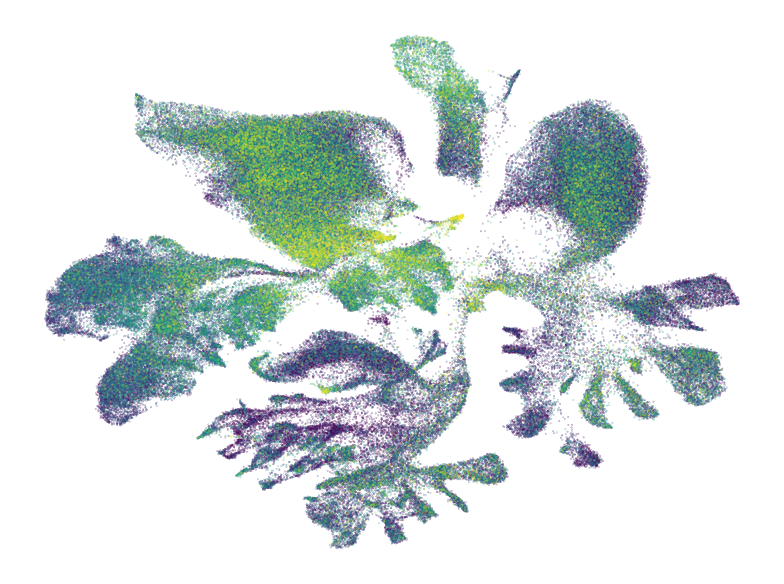

In [174]:
plt.figure(figsize = (8,6))
plt.scatter(x = df['UMAP0'], y = df['UMAP1'], c = df['program_2'], cmap = 'viridis', s = 0.01, vmin = -0.5, vmax = 2)
# plt.colorbar()
plt.axis('off')
plt.tight_layout()
plt.savefig("/data/norman/eli/T7/202404_SIRLOIN_multiome/figs/revision/outs/Szz_P2score.png", dpi = 600)
plt.show()